In [1]:
import pandas as pd
import numpy as np
import pymssql  
import requests as re
import json
import geopandas as gpd
from shapely import geometry
from matplotlib import pyplot as plt
import os
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.decomposition import PCA

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from yellowbrick.cluster import KElbowVisualizer

# 1 all of POI data file

In [2]:
def obtain_poi(R,bss,p01):
    ge=bss.buffer(R)
    df=gpd.GeoDataFrame(geometry=ge) 
    df['station']=bss['station']
    poim = gpd.sjoin(p01,df,predicate='within')
    poim = poim.groupby(by='station').count()[['TYPE']]
    poim=poim.reset_index()
    df2=bss[['station']]
    df3=pd.merge(df2,poim,how='outer')
    df3=df3.fillna(0)
    df3=pd.merge(df2,poim,how='outer')
    df3=df3.fillna(0)
    return df3
def tj_num(bss,p01):
    R=500
    df_all=obtain_poi(R,bss,p01)
    return df_all
def obtain_all_poiNum(bss):
    path =r"D:\Beijingdata\POI_shp"
    files= os.listdir(path) 
    
    bss=bss.to_crs('+init=epsg:3395')
    n_all=[]
    t=0
    for file in files:
        if 'point' in file.split('_')[-1].split('.'):
            if 'shp' in file.split('.') and 'shp'==file.split('.')[-1]:
                n_i=file.split('_')[0]
                if 'P' in file.split('_')[0]:
                    n_i=file.split('_')[0][3::]
                    f=path+'\\'+file
                    p01=gpd.read_file(f,encoding='gbk') 
                    p01=p01.to_crs('+init=epsg:3395')
                    df_all=tj_num(bss,p01)
                    n_all.append(n_i)
                    if t==0:
                        poi=df_all.copy()
                    else:
                        poi[n_i]=list(df_all['TYPE'])
                    t=t+1
    bss=bss.to_crs('EPSG:4326')
    poi=poi.rename(columns={'TYPE':n_all[0]})
    return poi,bss

##  1.1 catchment

In [3]:
bss=gpd.read_file(r'shapefile\bus_station.shp',encoding='utf-8') 
bss_poi,bss=obtain_all_poiNum(bss)
bss_poi.head()

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

,station,政府机构,机场,火车站地铁站,汽车站,公交车站,加油站加气站,停车场,高速服务区,收费站,...,公园广场,住宅小区,综合信息,餐饮服务,汽车服务,省市区县政府,风景名胜,电讯服务,公共厕所,港口码头
0,霍营北口,1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,新苑街,3.0,0.0,4.0,0.0,18.0,0.0,7.0,4.0,0.0,...,0.0,3.0,10.0,46.0,1.0,0.0,3.0,0.0,1.0,0.0
2,建功北里,9.0,0.0,0.0,0.0,16.0,1.0,7.0,0.0,0.0,...,0.0,8.0,31.0,27.0,1.0,0.0,0.0,1.0,11.0,0.0
3,万盛北里,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
4,莲怡园北路,5.0,0.0,0.0,0.0,8.0,0.0,6.0,0.0,0.0,...,0.0,13.0,15.0,16.0,2.0,0.0,0.0,1.0,1.0,0.0


###  1.1.1  PCA and K-means

In [6]:
bss.shape[0]==bss.shape[0]

True

In [7]:
def PAC_poi(bss_poi):
    bss_poi.index=list(bss_poi['station'])
    bss_poi=bss_poi.drop(columns='station')
    # 标准化
    cols = bss_poi.columns
    for col in cols:
        bss_poi[col] = normalize(bss_poi[col].to_numpy().reshape(1, -1), norm='max')[0]
    X = bss_poi.values
    X=X.T
    pca = PCA(n_components=0.95)  # 95% of the variance
    pca.fit(X)
    reduced_X = pca.fit_transform(X)
    print(reduced_X.shape)
    return reduced_X
def K_meanspoi(reduced_X):
    range_n_clusters = list(range(2,21))
    X = reduced_X
    scores_v = []
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(reduced_X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        scores_v.append(silhouette_avg)
    plt.rcParams['figure.figsize'] = (12,5)
    plt.style.use('ggplot')
    plt.plot([i for i in range(2,21)],scores_v,lw=3,marker='o')
    plt.xticks([i for i in range(2,21)])
    plt.xlabel('$K$')
    plt.ylabel('$silhouette$'+' '+'$score$')
    plt.show()
    clu = KMeans(random_state=10)
    visualizer = KElbowVisualizer(clu,k=(2,21))
    visualizer.fit(reduced_X)
    plt.xticks([i for i in range(1,21)])
    visualizer.show()
def K_means_jg(reduced_X,opti_k,bss_poi):
    # opti_k:最佳聚类簇数，由如图读取
    clusterer = KMeans(n_clusters=opti_k, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_X)
    poi_c=list(bss_poi.columns)[1::]
    all_poi_use=pd.DataFrame()
    all_poi_use['poi_name']=poi_c
    all_poi_use['cluster_label'] = cluster_labels
    return all_poi_use

(27, 18)


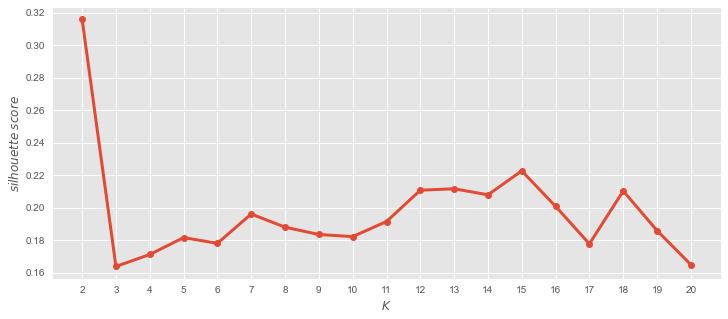

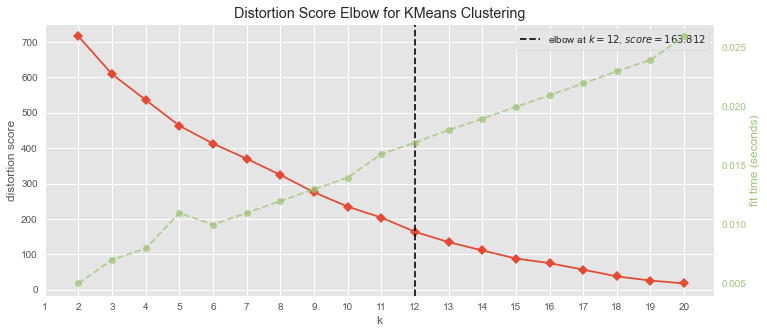

In [8]:
reduced_X=PAC_poi(bss_poi)
K_meanspoi(reduced_X)

In [10]:
opti_k=12
all_poi_use=K_means_jg(reduced_X,opti_k,bss_poi)

In [56]:
len(set(list(all_poi_use.poi_name)))

27

In [48]:
all_poi_use[all_poi_use['cluster_label']==11]

,poi_name,cluster_label
0,政府机构,11
11,零售行业,11
12,宾馆酒店,11
14,医疗服务,11
15,科研教育,11
25,公共厕所,11


###   new new_lable可视化

In [133]:
cls={'教育':['科研教育'],
    '生活服务':['餐饮服务','住宅小区','公共厕所','电讯服务','医疗服务'],
    '行政服务':['政府机构','省市区县政府','综合信息'],
    '商业设施':['金融服务','商业大厦','公司企业','零售行业'],
    '休闲娱乐':['休闲娱乐','公园广场','宾馆酒店','风景名胜'],
    '交通设施':['停车场','机场','汽车站','收费站','汽车服务','港口码头','加油站加气站','公交车站','火车站地铁站','高速服务区']}
idcls={'教育':1,
      '生活服务':2,
      '行政服务':3,
      '商业设施':4,
      '休闲娱乐':5,
      '交通设施':6}
EN={'教育':'Education',
      '生活服务':'Living facilities',
      '行政服务':'Public service',
      '商业设施':'Commercial facilities',
      '休闲娱乐':'Entertainment',
      '交通设施':'Travel service'}

In [135]:
all_poi_use['new_lable']=all_poi_use['poi_name'].apply(lambda x:[k for k,c in cls.items() if x in c][0])
all_poi_use['id_new_lable']=all_poi_use['new_lable'].apply(lambda x: [c for k,c in idcls.items() if x == k][0])
all_poi_use['EN_new_lable']=all_poi_use['new_lable'].apply(lambda x:[c for k,c in EN.items() if x == k][0])
all_poi_use.head()

,poi_name,cluster_label,new_lable,id_new_lable,EN_new_lable
0,政府机构,11,行政服务,3,Public service
1,机场,3,交通设施,6,Travel service
2,火车站地铁站,8,交通设施,6,Travel service
3,汽车站,3,交通设施,6,Travel service
4,公交车站,7,交通设施,6,Travel service


#####  new_统计站点对应各类POI数量

In [ ]:
# 公交
bss_poi_new=pd.DataFrame()
for k,c in cls.items():
    bss_poi_new[k]=np.sum(bss_poi[c].values,axis=1)
bss_poi_new.index=bss_poi.index

In [156]:
# 地铁
mm=gpd.read_file(r'shapefile\subway_station.shp',encoding='utf-8') # 读取点文件
mm_poi,mm=obtain_all_poiNum(mm)
mm_poi.head()

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

,station,政府机构,机场,火车站地铁站,汽车站,公交车站,加油站加气站,停车场,高速服务区,收费站,...,公园广场,住宅小区,综合信息,餐饮服务,汽车服务,省市区县政府,风景名胜,电讯服务,公共厕所,港口码头
0,魏公村,4.0,0.0,0.0,0.0,8.0,0.0,9.0,0.0,0.0,...,0.0,2.0,6.0,14.0,5.0,0.0,0.0,4.0,1.0,0.0
1,西红门,0.0,0.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,...,0.0,13.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,北苑,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,张自忠路,6.0,0.0,4.0,0.0,10.0,0.0,11.0,0.0,0.0,...,3.0,10.0,30.0,71.0,3.0,0.0,1.0,2.0,5.0,0.0
4,安贞门,4.0,0.0,2.0,0.0,16.0,0.0,12.0,0.0,0.0,...,1.0,14.0,27.0,18.0,1.0,0.0,0.0,1.0,2.0,0.0


In [159]:
mm_poi_new=pd.DataFrame()
for k,c in cls.items():
    mm_poi_new[k]=np.sum(mm_poi[c].values,axis=1)
mm_poi_new.index=list(mm_poi['station'])
mm_poi_new.head()

,教育,生活服务,行政服务,商业设施,休闲娱乐,交通设施
魏公村,6.0,25.0,10.0,58.0,12.0,22.0
西红门,2.0,19.0,13.0,21.0,4.0,15.0
北苑,0.0,0.0,0.0,0.0,1.0,0.0
张自忠路,9.0,97.0,36.0,112.0,24.0,28.0
安贞门,7.0,40.0,31.0,45.0,15.0,31.0


#####  new 可视化

In [180]:
bss_poi_new=bss_poi_new.reset_index()
bss_poi_new=bss_poi_new.rename(columns={'index':'station'})

In [182]:
gebss_poi_new=bss_poi_new.merge(bss,on=['station'],how='inner')

In [185]:
mm_poi_new=mm_poi_new.reset_index()
mm_poi_new=mm_poi_new.rename(columns={'index':'station'})
gemm_poi_new=mm_poi_new.merge(mm,on=['station'],how='inner')

In [202]:
def xx(x):
    return str(x[0])+','+str(x[1])
gemm_poi_new['gps']=gemm_poi_new[['lng','lat']].apply(lambda x:xx(x),axis=1)
gemm_poi_new.head(1)

,station,教育,生活服务,行政服务,商业设施,休闲娱乐,交通设施,lng,lat,geometry,gps
0,魏公村,6.0,25.0,10.0,58.0,12.0,22.0,116.329874,39.963457,POINT (116.32987 39.96346),"116.329874,39.963457"


In [207]:
gemm_poi_new.to_excel(r'C:\Users\111\Desktop\地体各类别POI数量.xlsx')

In [208]:
gebss_poi_new.to_excel(r'C:\Users\111\Desktop\公交各类别POI数量.xlsx')

In [212]:
gebss_poi_new['sum']=np.sum(gebss_poi_new[list(EN.keys())].values,axis=1)

In [ ]:
EN={'教育':'Education',
      '生活服务':'Living facilities',
      '行政服务':'Public service',
      '商业设施':'Commercial facilities',
      '休闲娱乐':'Entertainment',
      '交通设施':'Travel service'}

In [214]:
gebss_poi_new=gebss_poi_new.rename(columns=EN)

In [215]:
gebss_poi_new.head(1)

,station,Education,Living facilities,Public service,Commercial facilities,Entertainment,Travel service,lng,lat,geometry,sum
0,霍营北口,2.0,6.0,1.0,11.0,5.0,9.0,116.36554,40.08844,POINT (116.36554 40.08844),34.0


In [216]:
gemm_poi_new['sum']=np.sum(gemm_poi_new[list(EN.keys())].values,axis=1)
gemm_poi_new=gemm_poi_new.rename(columns=EN)
gemm_poi_new.to_excel(r'C:\Users\111\Desktop\地体各类别POI数量1.xlsx')
gebss_poi_new.to_excel(r'C:\Users\111\Desktop\公交各类别POI数量1.xlsx')

###  1.1.2 统计POI类的数量-对应站点

In [11]:
bss_poi=bss_poi.drop(columns=['station'])

In [12]:
cols=['level_'+str(c) for c in range(opti_k)]
bss_num=pd.DataFrame()
for i in range(opti_k):
    n_i=list(all_poi_use[all_poi_use['cluster_label']==i]['poi_name'])
    num_i=np.sum(bss_poi[n_i].values,axis=1)
    bss_num[cols[i]]=num_i
bss_num.index=bss_poi.index

In [13]:
bss_num.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11
霍营北口,0.0,0.0,10.0,1.0,3.0,5.0,0.0,8.0,0.0,0.0,0.0,7.0
新苑街,0.0,0.0,87.0,4.0,3.0,31.0,0.0,18.0,4.0,0.0,4.0,49.0
建功北里,1.0,0.0,65.0,1.0,8.0,47.0,1.0,16.0,0.0,0.0,0.0,64.0
万盛北里,0.0,0.0,9.0,1.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0
莲怡园北路,1.0,0.0,36.0,2.0,13.0,30.0,0.0,8.0,0.0,0.0,0.0,27.0


In [218]:
np.sum(np.sum((bss_num.values)))

524431.0

####  1.1.3 计算熵权

In [174]:
npois=bss_num.values
h1=np.zeros(npois.shape)
h2=[npois[:,c]*np.log(npois[:,c]) for c in range(npois.shape[1])]
h2=[np.nan_to_num(h2[c]) for c in range(len(h2))]
h3=-sum(h2)/(np.log(npois.shape[1]))
h3=np.nan_to_num(h3)
h4=(1-h3)/(h3.shape[0]-sum(h3))
E=pd.DataFrame()
E['POI_W']=h4
E.index=bss_num.index
E.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


,POI_W
霍营北口,0.000034
新苑街,0.000384
建功北里,0.000395
万盛北里,0.000027
莲怡园北路,0.000189


#  2 Classification

In [176]:
bss1=gpd.read_file(r'shapefile\subway_station.shp',encoding='utf-8') # 读取点文件
bss_poi1,bss1=obtain_all_poiNum(bss1)
bss_poi1.head()

,station,政府机构,机场,火车站地铁站,汽车站,公交车站,加油站加气站,停车场,高速服务区,收费站,...,公园广场,住宅小区,综合信息,餐饮服务,汽车服务,省市区县政府,风景名胜,电讯服务,公共厕所,港口码头
0,魏公村,4.0,0.0,0.0,0.0,8.0,0.0,9.0,0.0,0.0,...,0.0,2.0,6.0,14.0,5.0,0.0,0.0,4.0,1.0,0.0
1,西红门,0.0,0.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,...,0.0,13.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,北苑,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,张自忠路,6.0,0.0,4.0,0.0,10.0,0.0,11.0,0.0,0.0,...,3.0,10.0,30.0,71.0,3.0,0.0,1.0,2.0,5.0,0.0
4,安贞门,4.0,0.0,2.0,0.0,16.0,0.0,12.0,0.0,0.0,...,1.0,14.0,27.0,18.0,1.0,0.0,0.0,1.0,2.0,0.0


(27, 18)


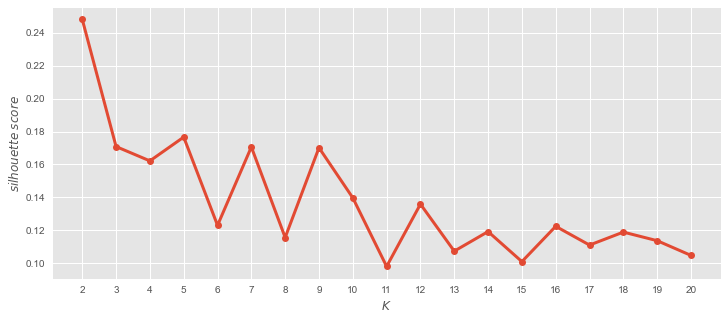

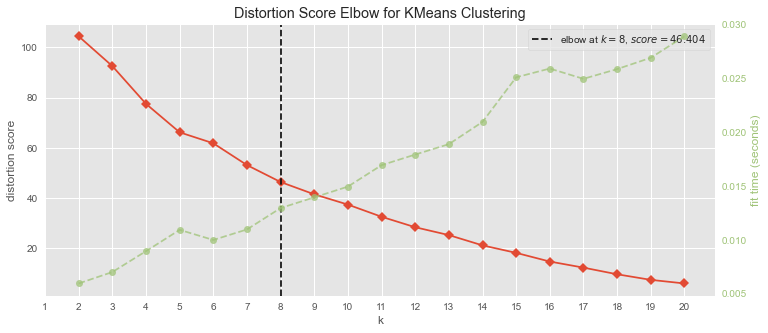

In [177]:
reduced_X1=PAC_poi(bss_poi1)
K_meanspoi(reduced_X1)


In [182]:
opti_k1=9
all_poi_use1=K_means_jg(reduced_X1,opti_k1,bss_poi1)

In [183]:
bss_poi1=bss_poi1.drop(columns=['station'])

In [184]:
cols=['level_'+str(c) for c in range(opti_k1)]
bss_num1=pd.DataFrame()
for i in range(opti_k1):
    n_i=list(all_poi_use1[all_poi_use1['cluster_label']==i]['poi_name'])
    num_i=np.sum(bss_poi1[n_i].values,axis=1)
    bss_num1[cols[i]]=num_i
bss_num1.index=bss_poi1.index

In [185]:
npois1=bss_num1.values
h1_1=np.zeros(npois1.shape)
h2_1=[npois1[:,c]*np.log(npois1[:,c]) for c in range(npois1.shape[1])]
h2_1=[np.nan_to_num(h2_1[c]) for c in range(len(h2_1))]
h3_1=-sum(h2_1)/(np.log(npois1.shape[1]))
h3_1=np.nan_to_num(h3_1)
h4_1=(1-h3_1)/(h3_1.shape[0]-sum(h3_1))
E_1=pd.DataFrame()
E_1['POI_W']=h4_1
E_1.index=bss_num1.index
E_1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


,POI_W
魏公村,0.003319
西红门,0.001376
北苑,0.000015
张自忠路,0.009234
安贞门,0.004082


#  3 POI

In [ ]:
be=list(E.index)
be1=[c+'_buss' for c in be]
sb=list(E_1.index)
sb1=[c+'_metro' for c in sb]
be1.extend(sb1)
POi_b=list(E['POI_W'])
POi_m=list(E_1['POI_W'])
POi_b.extend(POi_m)
POI_W=pd.DataFrame()
POI_W['POI_W']=np.array(POi_b)/sum(POi_b)
POI_W.index=be1

In [202]:
POI_W.sort_values('POI_W',ascending='False')


,POI_W
长流水_buss,6.281669e-07
沙峪_buss,6.281669e-07
南口农场_buss,6.281669e-07
大栜树_buss,6.281669e-07
小户岭新村_buss,6.281669e-07
...,...
崇文门_metro,7.787334e-03
苏州街_metro,8.975662e-03
虎坊桥_metro,1.047994e-02
巴沟_metro,1.249449e-02


#  POI数据的可视化分析

##  地铁

In [203]:
bss_num1

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8
魏公村,2.0,24.0,81.0,8.0,0.0,0.0,14.0,0.0,4.0
西红门,13.0,2.0,26.0,12.0,0.0,0.0,17.0,0.0,4.0
北苑,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
张自忠路,10.0,30.0,194.0,10.0,3.0,0.0,46.0,4.0,9.0
安贞门,14.0,16.0,75.0,16.0,1.0,0.0,40.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...
天通苑南,2.0,4.0,13.0,20.0,0.0,0.0,6.0,0.0,3.0
临河里,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
张郭庄,0.0,19.0,24.0,0.0,0.0,0.0,4.0,0.0,0.0
永定门外,2.0,34.0,30.0,8.0,1.0,0.0,11.0,0.0,4.0


In [210]:
clusterer = KMeans(n_clusters=7, random_state=10)
cluster_labels = clusterer.fit_predict(bss_num1.values)
mc=pd.DataFrame()
mc['cluster_labels']=cluster_labels
mc['station']=list(bss_num1.index)
spatialDis = bss1.merge(mc,on='station')

mc.head(1)

,cluster_labels,station
0,3,魏公村


In [214]:
beij=gpd.read_file(r'shapefile\beij_fq.shp',encoding='utf-8') # 读取点文件

In [230]:
spatialDis['functional'] = spatialDis['cluster_labels'].map(functional)
spatialDis

,station,lng,lat,geometry,cluster_labels,functional
0,魏公村,116.329874,39.963457,POINT (116.32987 39.96346),3,NaN
1,西红门,116.335169,39.795445,POINT (116.33517 39.79544),1,NaN
2,北苑,116.441315,40.048872,POINT (116.44132 40.04887),1,NaN
3,张自忠路,116.423579,39.939914,POINT (116.42358 39.93991),5,NaN
4,安贞门,116.412371,39.983322,POINT (116.41237 39.98332),3,NaN
...,...,...,...,...,...,...
277,天通苑南,116.419113,40.072752,POINT (116.41911 40.07275),1,NaN
278,临河里,116.685467,39.881239,POINT (116.68547 39.88124),1,NaN
279,张郭庄,116.193406,39.864102,POINT (116.19341 39.86410),1,NaN
280,永定门外,116.405729,39.873727,POINT (116.40573 39.87373),3,NaN


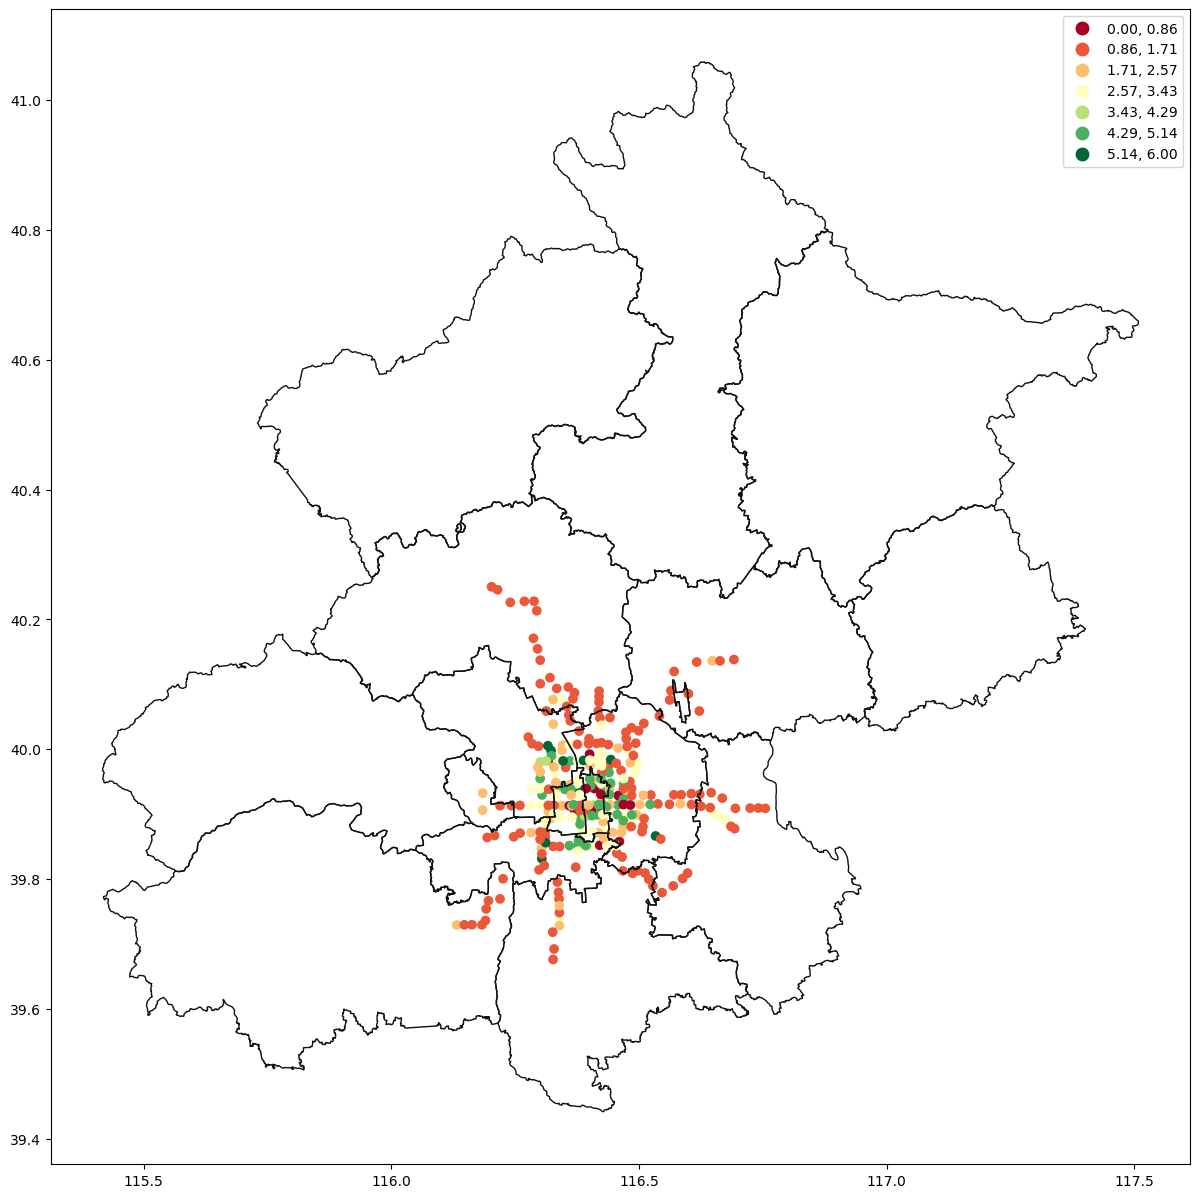

In [248]:
plt.style.use('default')
fig,ax=plt.subplots(figsize=(15,15))
spatialDis.plot(ax=ax,column='cluster_labels',cmap='RdYlGn',scheme="equalinterval",k=7,legend=True)
beij.plot(ax=ax,facecolor='none',edgecolor='k')
plt.grid(False)

##  公交

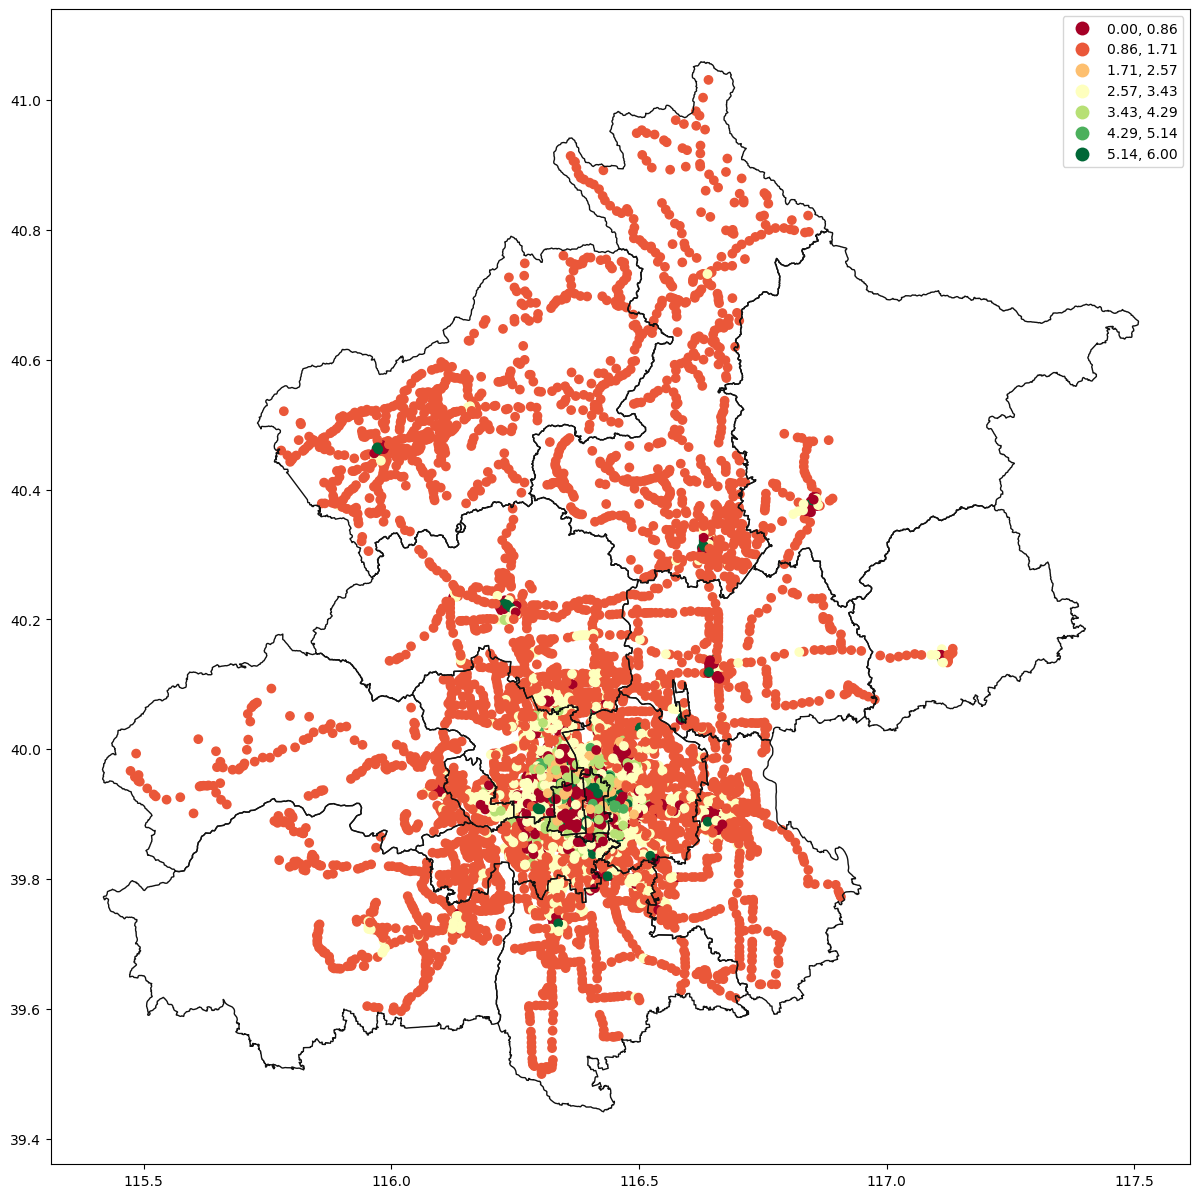

In [345]:
plt.style.use('default')
clusterer = KMeans(n_clusters=7, random_state=10)
cluster_labels = clusterer.fit_predict(bss_num.values)
mc1=pd.DataFrame()
mc1['cluster_labels']=cluster_labels
mc1['station']=list(bss_num.index)
spatialDis1 = bss.merge(mc1,on='station')
fig,ax=plt.subplots(figsize=(15,15))
spatialDis1.plot(ax=ax,column='cluster_labels',cmap='RdYlGn',scheme="equalinterval",k=7,legend=True)
beij.plot(ax=ax,facecolor='none',edgecolor='k')
plt.grid(False)

#  weigth for POI data

In [253]:
pbs=bss.copy()
st1=[c+'_buss' for c in list(pbs['station'])]
pbs['station']=st1
pbs.head()

,station,lng,lat,geometry
0,霍营北口_buss,116.36554,40.08844,POINT (116.36554 40.08844)
1,新苑街_buss,116.32855,39.93540,POINT (116.32855 39.93540)
2,建功北里_buss,116.35368,39.88061,POINT (116.35368 39.88061)
3,万盛北里_buss,116.65084,39.86986,POINT (116.65084 39.86986)
4,莲怡园北路_buss,116.29767,39.88671,POINT (116.29767 39.88671)


In [255]:
sbs=bss1.copy()
st2=[c+'_metro' for c in list(sbs['station'])]
sbs['station']=st2

sbs.head()

,station,lng,lat,geometry
0,魏公村_metro,116.329874,39.963457,POINT (116.32987 39.96346)
1,西红门_metro,116.335169,39.795445,POINT (116.33517 39.79544)
2,北苑_metro,116.441315,40.048872,POINT (116.44132 40.04887)
3,张自忠路_metro,116.423579,39.939914,POINT (116.42358 39.93991)
4,安贞门_metro,116.412371,39.983322,POINT (116.41237 39.98332)


In [266]:
mbs=pd.concat([pbs,sbs])
print(mbs.shape)

(7466, 4)


In [267]:
mbs.head(1)

,station,lng,lat,geometry
0,霍营北口_buss,116.36554,40.08844,POINT (116.36554 40.08844)


In [299]:
wpoi=POI_W.copy()
wpoi['station']=list(wpoi.index)
wpoi.head(1)

,POI_W,station
长流水_buss,6.281669e-07,长流水_buss


In [300]:
wpoi['POI_W']=wpoi['POI_W'].values*10

In [326]:
clusterer = KMeans(n_clusters=5, random_state=10)

cluster_labels = clusterer.fit_predict(wpoi['POI_W'].array.reshape(wpoi.shape[0], -1))
wpoi['cluster_labels']=cluster_labels

In [327]:
wpoi.head(1)

,POI_W,station,cluster_labels
长流水_buss,0.000006,长流水_buss,0


In [ ]:
# OrRd

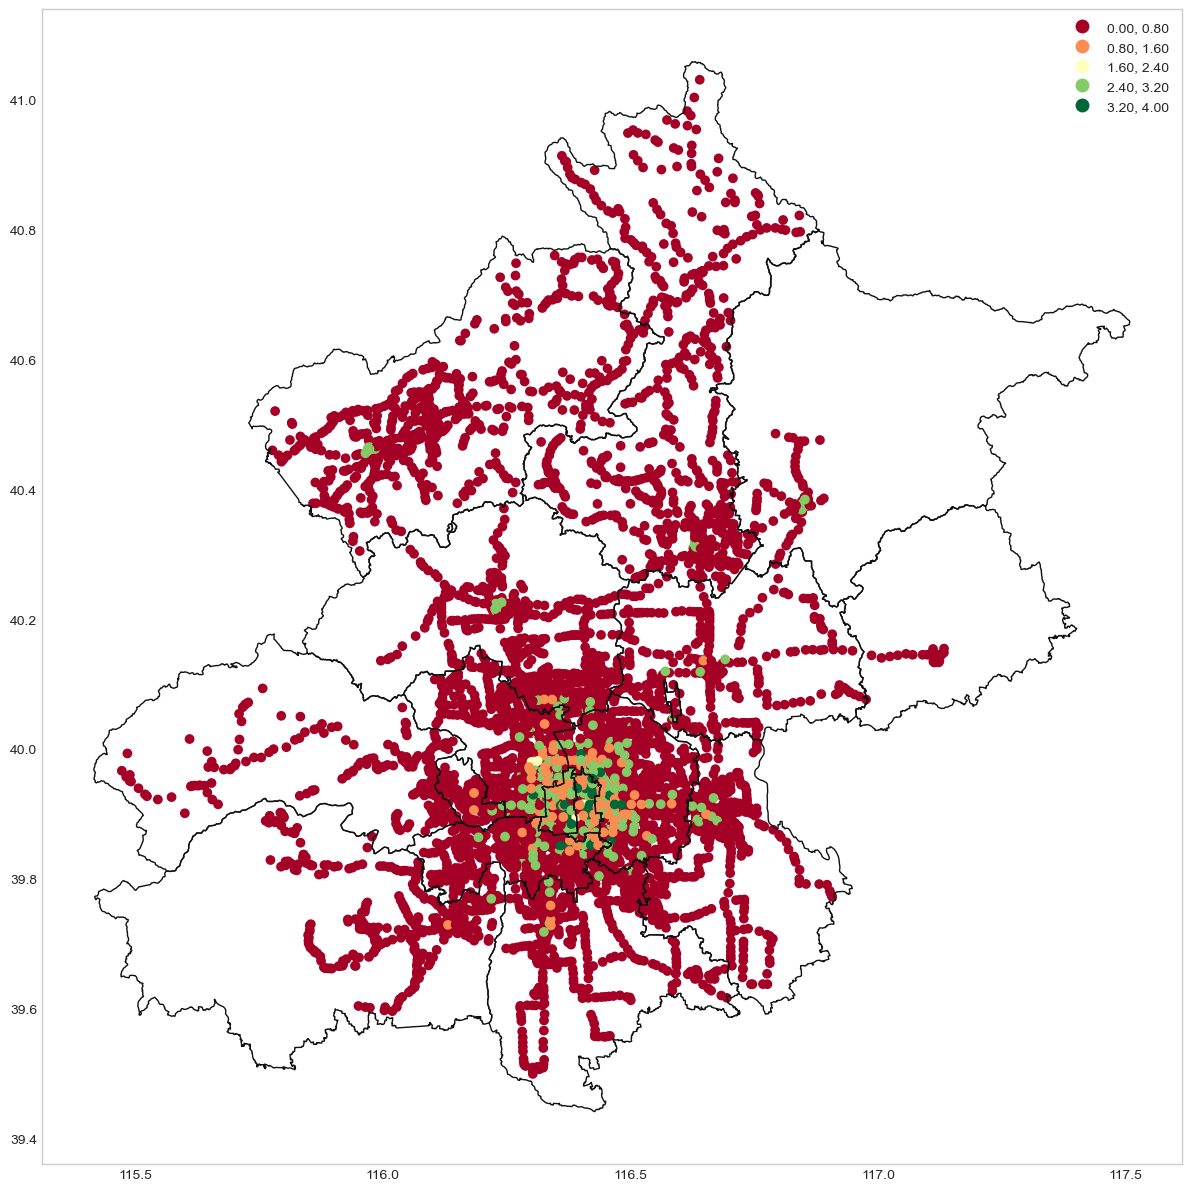

In [349]:
spd = mbs.merge(wpoi,on='station')
plt.style.use('seaborn-whitegrid')

fig,ax=plt.subplots(figsize=(15,15))
spd.plot(ax=ax,column='cluster_labels',cmap='RdYlGn',scheme="equalinterval",k=5,legend=True)
beij.plot(ax=ax,facecolor='none',edgecolor='k')
plt.grid(False)

#  4 Save

In [334]:
POI_W=POI_W.reset_index()
POI_W.rename(columns={'index':'station'})
POI_W.to_csv('POI类权重.csv',encoding='gbk')
POI_W.head()

,index,POI_W
0,长流水_buss,6.281669e-07
1,杨树底下_buss,6.281669e-07
2,石峡关_buss,6.281669e-07
3,磨石峪_buss,6.281669e-07
4,荆栗园_buss,6.281669e-07


In [337]:
POI_W.to_csv('POI类权重.csv',encoding='gbk')

In [339]:
bss_num.to_csv('公交站点POI数量.csv',encoding='gbk')

In [340]:
bss_num1.to_csv('地铁站点POI数量.csv',encoding='gbk')

In [343]:
spd.to_file(r'shapefile\sub_buss_poi.shp',driver='ESRI Shapefile',encoding='utf-8')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [347]:
spatialDis1.to_file(r'shapefile\bus_poiclass.shp',driver='ESRI Shapefile',encoding='utf-8')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [348]:
spatialDis.to_file(r'shapefile\metro_poiclass.shp',driver='ESRI Shapefile',encoding='utf-8')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.
